In [2]:
#Importação das bibliotecas utilizadas para manipulação dos dados das paginas Web.

from datetime import datetime

print(f'Ativação das bibliotecas iniciada - {datetime.now()}.')

from bs4 import BeautifulSoup
import urllib.request
import shutil
import os
import pandas as pd
import pyspark
import zipfile
import sqlalchemy
import pymysql
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import * 

print(f'Ativação das bibliotecas com sucesso - {datetime.now()}.')

Ativação das bibliotecas iniciada - 2020-09-20 13:51:37.674009.
Ativação das bibliotecas com sucesso - 2020-09-20 13:51:44.615042.


In [3]:
# Instanciar Spark

print(f'Intanciando o Spark - {datetime.now()}.')

sc = SparkContext()
sqlContext = SQLContext(sc)

print(f'Spark intanciado com sucesso - {datetime.now()}.')

Intanciando o Spark - 2020-09-20 13:51:44.642027.
Spark intanciado com sucesso - 2020-09-20 13:52:08.413360.


In [11]:
# No Processo abaixo, importaremos para o dataframe, apenas para conhecer os dados e verificar o separador do microdado.

print('')
print(f'Criação Dataframe do Enem 2015 iniciada - {datetime.now()}.')
df_enem2015_completo = sqlContext.read.format('com.databricks.spark.csv').options(header='true', sep=",", inferschema='true', encoding = 'ISO-8859-1', ).load(r'C:\Users\pc\Downloads\MicrodadosEnem\MICRODADOS_ENEM_2015.csv')
print(f'Dataframe df_enem2015_completo criado com sucesso - {datetime.now()}.')
print('')

Criação Dataframes Iniciado - 2020-09-20 14:06:58.236360.


Criação Dataframe do Enem 2015 iniciada - 2020-09-20 14:06:58.237358.
Dataframe df_enem2015_completo criado com sucesso - 2020-09-20 14:10:21.018170.



In [4]:
print(f'Criação Dataframe do Enem 2016 iniciada- {datetime.now()}.')
df_enem2016_completo = sqlContext.read.format('com.databricks.spark.csv').options(header='true', sep=";", inferschema='true', encoding = 'ISO-8859-1').load(r'C:\Users\pc\Downloads\MicrodadosEnem\microdados_enem_2016.csv')
print(f'Dataframe df_enem2016_completo criado com sucesso - {datetime.now()}.')
print('')

Criação Dataframe do Enem 2016 iniciada- 2020-09-20 13:52:11.202446.
Dataframe df_enem2016_completo criado com sucesso - 2020-09-20 13:56:13.563359.



In [5]:
print(f'Criação Dataframe do Enem 2017 iniciada - {datetime.now()}.')
df_enem2017_completo = sqlContext.read.format('com.databricks.spark.csv').options(header='true', sep=";", inferschema='true', encoding = 'ISO-8859-1').load(r'C:\Users\pc\Downloads\MicrodadosEnem\MICRODADOS_ENEM_2017.csv')
print(f'Dataframe df_enem2017_completo criado com sucesso - {datetime.now()}.')
print('')

Criação Dataframe do Enem 2017 iniciada - 2020-09-20 13:56:13.594340.
Dataframe df_enem2017_completo criado com sucesso - 2020-09-20 13:58:59.372648.



In [7]:
print(f'Criação Dataframe do Enem 2018 iniciada - {datetime.now()}.')
df_enem2018_completo = sqlContext.read.format('com.databricks.spark.csv').options(header='true', sep=";", inferschema='true', encoding = 'ISO-8859-1').load(r'C:\Users\pc\Downloads\MicrodadosEnem\MICRODADOS_ENEM_2018.csv')
print(f'Dataframe df_enem2018_completo criado com sucesso - {datetime.now()}.')
print('')

Criação Dataframe do Enem 2018 iniciada - 2020-09-20 14:01:13.661042.
Dataframe df_enem2018_completo criado com sucesso - 2020-09-20 14:03:32.914198.



In [6]:
# No Processo abaixo, importaremos para o dataframe, apenas para conhecer os dados e verificar o separador do microdado.

print(f'Criação Dataframe do Enem 2019 iniciada - {datetime.now()}.')
df_enem2019_completo = sqlContext.read.format('com.databricks.spark.csv').options(header='true', sep=";", inferschema='true', encoding = 'ISO-8859-1').load(r'C:\Users\pc\Downloads\MicrodadosEnem\MICRODADOS_ENEM_2019.csv')
print(f'Dataframe df_enem2019_completo criado com sucesso - {datetime.now()}.')
print('')

print('')
print(f'Dataframes criados com sucesso - {datetime.now()}.')

Criação Dataframe do Enem 2019 iniciada - 2020-09-20 13:58:59.410624.
Dataframe df_enem2019_completo criado com sucesso - 2020-09-20 14:01:13.577096.


Dataframes criados com sucesso - 2020-09-20 14:01:13.579092.


In [8]:
# Criação e seleção das colunas para realização das analises exploratórias

print(f'Criação da variável columns e seleção das colunas para realização das analises exploratórias - {datetime.now()}.')

columns = ['NU_INSCRICAO', 'NU_ANO', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS', 'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO', 'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO', 'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE', 'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA', 'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL', 'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO', 'IN_NOME_SOCIAL', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q005', 'Q006', 'Q022', 'Q024', 'Q025']

Criação da variável columns e seleção das colunas para realização das analises exploratórias - 2020-09-20 14:03:32.978159.


In [14]:
# No Processo abaixo, criaremos dataframes, apenas com colunas selecionadas.

print(f'Criação Dataframes Iniciado - {datetime.now()}.')
print('')

print('')
print(f'Criação Dataframe do Enem 2015 iniciada - {datetime.now()}.')
df_enem2015 = df_enem2015_completo.select(columns)
print(f'Dataframe df_enem2015 criado com sucesso - {datetime.now()}.')
print('')

print('')
print(f'Criação Dataframe do Enem 2016 iniciada - {datetime.now()}.')
df_enem2016 = df_enem2016_completo.select(columns)
print(f'Dataframe df_enem2016 criado com sucesso - {datetime.now()}.')
print('')

print('')
print(f'Criação Dataframe do Enem 2017 iniciada - {datetime.now()}.')
df_enem2017 = df_enem2017_completo.select(columns)
print(f'Dataframe df_enem2017 criado com sucesso - {datetime.now()}.')
print('')

print('')
print(f'Criação Dataframe do Enem 2018 iniciada - {datetime.now()}.')
df_enem2018 = df_enem2018_completo.select(columns)
print(f'Dataframe df_enem2018 criado com sucesso - {datetime.now()}.')
print('')

print('')
print(f'Criação Dataframe do Enem 2019 iniciada - {datetime.now()}.')
df_enem2019 = df_enem2019_completo.select(columns)
print(f'Dataframe df_enem2019 criado com sucesso - {datetime.now()}.')
print('')

Criação Dataframes Iniciado - 2020-09-20 14:12:22.499138.


Criação Dataframe do Enem 2015 iniciada - 2020-09-20 14:12:22.500136.
Dataframe df_enem2015 criado com sucesso - 2020-09-20 14:12:23.332623.


Criação Dataframe do Enem 2016 iniciada - 2020-09-20 14:12:23.333624.
Dataframe df_enem2016 criado com sucesso - 2020-09-20 14:12:23.992818.


Criação Dataframe do Enem 2017 iniciada - 2020-09-20 14:12:24.025799.
Dataframe df_enem2017 criado com sucesso - 2020-09-20 14:12:24.822915.


Criação Dataframe do Enem 2018 iniciada - 2020-09-20 14:12:24.825912.
Dataframe df_enem2018 criado com sucesso - 2020-09-20 14:12:25.587442.


Criação Dataframe do Enem 2019 iniciada - 2020-09-20 14:12:25.590440.
Dataframe df_enem2019 criado com sucesso - 2020-09-20 14:12:26.159091.



In [15]:
# Criação de um dataframe uníco, com a união de todos os dataframes criados. 

print(f'Criação Dataframe do df_enem iniciada - {datetime.now()}.')

df_enem = df_enem2015.unionAll(df_enem2016).unionAll(df_enem2017).unionAll(df_enem2018).unionAll(df_enem2019)

print(f'Dataframe df_enem criado com sucesso - {datetime.now()}.')

Criação Dataframe do df_enem iniciada - 2020-09-20 14:12:49.685729.
Dataframe df_enem criado com sucesso - 2020-09-20 14:12:50.133452.


In [ ]:
# Criação das colunas de classificação do dataframe df_enem_analise. 

print(f'Criação das Colunas Análise Exploratória - {datetime.now()}.')

df_enem_sexo = df_enem.withColumn('SEXO', expr("case when TP_SEXO = 'M' then 'Masculino' " + "when TP_SEXO = 'F' then 'Feminino' " + "else '' end"))

df_enem_estado_civil = df_enem_sexo.withColumn('ESTADO_CIVIL', expr("case when NU_ANO <> 2019 AND TP_ESTADO_CIVIL = 0 then 'Solteiro(a)' " + "when NU_ANO <> 2019 AND TP_ESTADO_CIVIL = 1 then 'Casado(a)/Mora com companheiro(a)' " + "when NU_ANO <> 2019 AND TP_ESTADO_CIVIL = 2 then 'Divorciado(a)/Desquitado(a)/Separado(a)' " + 
"when NU_ANO <> 2019 AND TP_ESTADO_CIVIL = 3 then 'Viúvo(a)' " + "when NU_ANO = 2019 AND TP_ESTADO_CIVIL = 0 then '' " + "when NU_ANO = 2019 AND TP_ESTADO_CIVIL = 1 then 'Solteiro(a)' " + "when NU_ANO = 2019 AND TP_ESTADO_CIVIL = 2 then 'Casado(a)/Mora com companheiro(a)' " + "when NU_ANO = 2019 AND TP_ESTADO_CIVIL = 3 then 'Divorciado(a)/Desquitado(a)/Separado(a)' " + "when NU_ANO = 2019 AND TP_ESTADO_CIVIL = 4 then 'Viúvo(a)' " + "else '' end"))

df_enem_raca = df_enem_estado_civil.withColumn('RACA', expr("case when TP_COR_RACA = 0 then 'Não declarado' " + "when TP_COR_RACA = 1 then 'Branca' " + "when TP_COR_RACA = 2 then 'Preta' " + "when TP_COR_RACA = 3 then 'Parda' " + "when TP_COR_RACA = 4 then 'Amarela' " + "when TP_COR_RACA = 5 then 'Indígena ' " + "else '' end"))

df_enem_nacionalidade = df_enem_raca.withColumn('NACIONALIDADE', expr("case when TP_NACIONALIDADE = 0 then 'Não informado' " + "when TP_NACIONALIDADE = 1 then 'Brasileiro(a)' " + "when TP_NACIONALIDADE = 2 then 'Brasileiro(a) Naturalizado(a)' " + "when TP_NACIONALIDADE = 3 then 'Estrangeiro(a)' " + "when TP_NACIONALIDADE = 4 then 'Brasileiro(a) Nato(a), nascido(a) no exterior' " + "else '' end"))

df_enem_st_conclusao = df_enem_nacionalidade.withColumn('SITUACAO_CONCLUSAO_ENSINO_MEDIO', expr("case when TP_ST_CONCLUSAO = 1 then 'Já concluí o Ensino Médio' " + "when TP_ST_CONCLUSAO = 2 then 'Estou cursando e concluirei o Ensino Médio no ano' " + "when TP_ST_CONCLUSAO = 3 then 'Estou cursando e concluirei o Ensino Médio após este ano' " + "when TP_ST_CONCLUSAO = 4 then 'Não concluí e não estou cursando o Ensino Médio' " + "else '' end"))

df_enem_tp_escola = df_enem_st_conclusao.withColumn('TIPO_ESCOLA', expr("case when TP_ESCOLA = 1 then 'Não Respondeu' " + "when TP_ESCOLA = 2 then 'Pública' " + "when TP_ESCOLA = 3 then 'Privada' " + "when TP_ESCOLA = 4 then 'Exterior' " + "else '' end"))

df_enem_tp_ensino = df_enem_tp_escola.withColumn('TIPO_ENSINO', expr("case when TP_ENSINO = 1 then 'Ensino Regular' " + "when TP_ENSINO = 2 then 'Educação Especial - Modalidade Substitutiva' " + "when TP_ENSINO = 3 then 'Educação de Jovens e Adultos' " + "else '' end"))

df_enem_in_treineiro = df_enem_tp_ensino.withColumn('TREINEIRO', expr("case when IN_TREINEIRO = 0 then 'Não' " + "when IN_TREINEIRO = 1 then 'Sim' " + "else '' end"))

df_enem_tp_dependencia_adm_esc = df_enem_in_treineiro.withColumn('DEPENDENCIA_ADMINISTRATIVA_ESCOLA', expr("case when TP_DEPENDENCIA_ADM_ESC = 1 then 'Federal' " + "when TP_DEPENDENCIA_ADM_ESC = 2 then 'Estadual' " + "when TP_DEPENDENCIA_ADM_ESC = 3 then 'Municipal' " + "when TP_DEPENDENCIA_ADM_ESC = 4 then 'Privada' " + "else '' end"))

df_enem_tp_localizacao_esc = df_enem_tp_dependencia_adm_esc.withColumn('LOCALIZACAO_ESCOLA', expr("case when TP_LOCALIZACAO_ESC = 1 then 'Urbana' " + "when TP_LOCALIZACAO_ESC = 2 then 'Rural' " + "else '' end"))

df_enem_in_baixa_visao = df_enem_tp_localizacao_esc.withColumn('BAIXA_VISAO', expr("case when IN_BAIXA_VISAO = 0 then 'Não' " + "when IN_BAIXA_VISAO = 1 then 'Sim' " + "else '' end"))

df_enem_in_cegueira = df_enem_in_baixa_visao.withColumn('CEGUEIRA', expr("case when IN_CEGUEIRA = 0 then 'Não' " + "when IN_CEGUEIRA = 1 then 'Sim' " + "else '' end"))

df_enem_in_surdez = df_enem_in_cegueira.withColumn('SURDEZ', expr("case when IN_SURDEZ = 0 then 'Não' " + "when IN_SURDEZ = 1 then 'Sim' " + "else '' end"))

df_enem_in_deficiencia_auditiva = df_enem_in_surdez.withColumn('DEFICIENCIA_AUDITIVA', expr("case when IN_DEFICIENCIA_AUDITIVA = 0 then 'Não' " + "when IN_DEFICIENCIA_AUDITIVA = 1 then 'Sim' " + "else '' end"))

df_enem_in_surdo_cegueira = df_enem_in_deficiencia_auditiva.withColumn('SURDO_CEGUEIRA', expr("case when IN_SURDO_CEGUEIRA = 0 then 'Não' " + "when IN_SURDO_CEGUEIRA = 1 then 'Sim' " + "else '' end"))

df_enem_in_deficiencia_fisica = df_enem_in_surdo_cegueira.withColumn('DEFICIENCIA_FISICA', expr("case when IN_DEFICIENCIA_FISICA = 0 then 'Não' " + "when IN_DEFICIENCIA_FISICA = 1 then 'Sim' " + "else '' end"))

df_enem_in_deficiencia_mental = df_enem_in_deficiencia_fisica.withColumn('DEFICIENCIA_MENTAL', expr("case when IN_DEFICIENCIA_MENTAL = 0 then 'Não' " + "when IN_DEFICIENCIA_MENTAL = 1 then 'Sim' " + "else '' end"))

df_enem_in_deficit_atencao = df_enem_in_deficiencia_mental.withColumn('DEFICIT_ATENCAO', expr("case when IN_DEFICIT_ATENCAO = 0 then 'Não' " + "when IN_DEFICIT_ATENCAO = 1 then 'Sim' " + "else '' end"))

df_enem_in_dislexia = df_enem_in_deficit_atencao.withColumn('DISLEXIA', expr("case when IN_DISLEXIA = 0 then 'Não' " + "when IN_DISLEXIA = 1 then 'Sim' " + "else '' end"))

df_enem_in_discalculia = df_enem_in_dislexia.withColumn('DISCALCULIA', expr("case when IN_DISCALCULIA = 0 then 'Não' " + "when IN_DISCALCULIA = 1 then 'Sim' " + "else '' end"))

df_enem_in_autismo = df_enem_in_discalculia.withColumn('AUTISMO', expr("case when IN_AUTISMO = 0 then 'Não' " + "when IN_AUTISMO = 1 then 'Sim' " + "else '' end"))

df_enem_in_visao_monocular = df_enem_in_autismo.withColumn('VISAO_MONOCULAR', expr("case when IN_VISAO_MONOCULAR = 0 then 'Não' " + "when IN_VISAO_MONOCULAR = 1 then 'Sim' " + "else '' end"))

df_enem_in_outra_def = df_enem_in_visao_monocular.withColumn('OUTRA_DEF', expr("case when IN_OUTRA_DEF = 0 then 'Não' " + "when IN_OUTRA_DEF = 1 then 'Sim' " + "else '' end"))

df_enem_in_gestante = df_enem_in_outra_def.withColumn('GESTANTE', expr("case when IN_GESTANTE = 0 then 'Não' " + "when IN_GESTANTE = 1 then 'Sim' " + "else '' end"))

df_enem_in_lactante = df_enem_in_gestante.withColumn('LACTANTE', expr("case when IN_LACTANTE = 0 then 'Não' " + "when IN_LACTANTE = 1 then 'Sim' " + "else '' end"))

df_enem_in_idoso = df_enem_in_lactante.withColumn('IDOSO', expr("case when IN_IDOSO = 0 then 'Não' " + "when IN_IDOSO = 1 then 'Sim' " + "else '' end"))

df_enem_in_estuda_classe_hospitalar = df_enem_in_idoso.withColumn('ESTUDA_CLASSE_HOSPITALAR', expr("case when IN_ESTUDA_CLASSE_HOSPITALAR = 0 then 'Não' " + "when IN_ESTUDA_CLASSE_HOSPITALAR = 1 then 'Sim' " + "else '' end"))

df_enem_in_sem_recurso = df_enem_in_estuda_classe_hospitalar.withColumn('SEM_RECURSO', expr("case when IN_SEM_RECURSO = 0 then 'Não' " + "when IN_SEM_RECURSO = 1 then 'Sim' " + "else '' end"))

df_enem_in_braille = df_enem_in_sem_recurso.withColumn('BRAILLE', expr("case when IN_BRAILLE = 0 then 'Não' " + "when IN_BRAILLE = 1 then 'Sim' " + "else '' end"))

df_enem_in_ampliada_24 = df_enem_in_braille.withColumn('AMPLIADA_24', expr("case when IN_AMPLIADA_24 = 0 then 'Não' " + "when IN_AMPLIADA_24 = 1 then 'Sim' " + "else '' end"))

df_enem_in_ampliada_18 = df_enem_in_ampliada_24.withColumn('AMPLIADA_18', expr("case when IN_AMPLIADA_18 = 0 then 'Não' " + "when IN_AMPLIADA_18 = 1 then 'Sim' " + "else '' end"))

df_enem_in_ledor = df_enem_in_ampliada_18.withColumn('LEDOR', expr("case when IN_LEDOR = 0 then 'Não' " + "when IN_LEDOR = 1 then 'Sim' " + "else '' end"))

df_enem_in_acesso = df_enem_in_ledor.withColumn('ACESSO', expr("case when IN_ACESSO = 0 then 'Não' " + "when IN_ACESSO = 1 then 'Sim' " + "else '' end"))

df_enem_in_transcricao = df_enem_in_acesso.withColumn('TRANSCRICAO', expr("case when IN_TRANSCRICAO = 0 then 'Não' " + "when IN_TRANSCRICAO = 1 then 'Sim' " + "else '' end"))

df_enem_in_libras = df_enem_in_transcricao.withColumn('LIBRAS', expr("case when IN_LIBRAS = 0 then 'Não' " + "when IN_LIBRAS = 1 then 'Sim' " + "else '' end"))

df_enem_in_leitura_labial = df_enem_in_libras.withColumn('LEITURA_LABIAL', expr("case when IN_LEITURA_LABIAL = 0 then 'Não' " + "when IN_LEITURA_LABIAL = 1 then 'Sim' " + "else '' end"))

df_enem_in_mesa_cadeira_rodas = df_enem_in_leitura_labial.withColumn('MESA_CADEIRA_RODAS', expr("case when IN_MESA_CADEIRA_RODAS = 0 then 'Não' " + "when IN_MESA_CADEIRA_RODAS = 1 then 'Sim' " + "else '' end"))

df_enem_in_mesa_cadeira_separada = df_enem_in_mesa_cadeira_rodas.withColumn('MESA_CADEIRA_SEPARADA', expr("case when IN_MESA_CADEIRA_SEPARADA = 0 then 'Não' " + "when IN_MESA_CADEIRA_SEPARADA = 1 then 'Sim' " + "else '' end"))

df_enem_in_apoio_perna = df_enem_in_mesa_cadeira_separada.withColumn('APOIO_PERNA', expr("case when IN_APOIO_PERNA = 0 then 'Não' " + "when IN_APOIO_PERNA = 1 then 'Sim' " + "else '' end"))

df_enem_in_guia_interprete = df_enem_in_apoio_perna.withColumn('GUIA_INTERPRETE', expr("case when IN_GUIA_INTERPRETE = 0 then 'Não' " + "when IN_GUIA_INTERPRETE = 1 then 'Sim' " + "else '' end"))

df_enem_in_computador = df_enem_in_guia_interprete.withColumn('COMPUTADOR', expr("case when IN_COMPUTADOR = 0 then 'Não' " + "when IN_COMPUTADOR = 1 then 'Sim' " + "else '' end"))

df_enem_in_cadeira_especial = df_enem_in_computador.withColumn('CADEIRA_ESPECIAL', expr("case when IN_CADEIRA_ESPECIAL = 0 then 'Não' " + "when IN_CADEIRA_ESPECIAL = 1 then 'Sim' " + "else '' end"))

df_enem_in_cadeira_canhoto = df_enem_in_cadeira_especial.withColumn('CADEIRA_CANHOTO', expr("case when IN_CADEIRA_CANHOTO = 0 then 'Não' " + "when IN_CADEIRA_CANHOTO = 1 then 'Sim' " + "else '' end"))

df_enem_in_cadeira_acolchoada = df_enem_in_cadeira_canhoto.withColumn('CADEIRA_ACOLCHOADA', expr("case when IN_CADEIRA_ACOLCHOADA = 0 then 'Não' " + "when IN_CADEIRA_ACOLCHOADA = 1 then 'Sim' " + "else '' end"))

df_enem_in_prova_deitado = df_enem_in_cadeira_acolchoada.withColumn('PROVA_DEITADO', expr("case when IN_PROVA_DEITADO = 0 then 'Não' " + "when IN_PROVA_DEITADO = 1 then 'Sim' " + "else '' end"))

df_enem_in_mobiliario_obeso = df_enem_in_prova_deitado.withColumn('MOBILIARIO_OBESO', expr("case when IN_MOBILIARIO_OBESO = 0 then 'Não' " + "when IN_MOBILIARIO_OBESO = 1 then 'Sim' " + "else '' end"))

df_enem_in_lamina_overlay = df_enem_in_mobiliario_obeso.withColumn('LAMINA_OVERLAY', expr("case when IN_LAMINA_OVERLAY = 0 then 'Não' " + "when IN_LAMINA_OVERLAY = 1 then 'Sim' " + "else '' end"))

df_enem_in_protetor_auricular = df_enem_in_lamina_overlay.withColumn('PROTETOR_AURICULAR', expr("case when IN_PROTETOR_AURICULAR = 0 then 'Não' " + "when IN_PROTETOR_AURICULAR = 1 then 'Sim' " + "else '' end"))

df_enem_in_medidor_glicose = df_enem_in_protetor_auricular.withColumn('MEDIDOR_GLICOSE', expr("case when IN_MEDIDOR_GLICOSE = 0 then 'Não' " + "when IN_MEDIDOR_GLICOSE = 1 then 'Sim' " + "else '' end"))

df_enem_in_maquina_braile = df_enem_in_medidor_glicose.withColumn('MAQUINA_BRAILE', expr("case when IN_MAQUINA_BRAILE = 0 then 'Não' " + "when IN_MAQUINA_BRAILE = 1 then 'Sim' " + "else '' end"))

df_enem_in_soroban = df_enem_in_maquina_braile.withColumn('SOROBAN', expr("case when IN_SOROBAN = 0 then 'Não' " + "when IN_SOROBAN = 1 then 'Sim' " + "else '' end"))

df_enem_in_marca_passo = df_enem_in_soroban.withColumn('MARCA_PASSO', expr("case when IN_MARCA_PASSO = 0 then 'Não' " + "when IN_MARCA_PASSO = 1 then 'Sim' " + "else '' end"))

df_enem_in_sonda = df_enem_in_marca_passo.withColumn('SONDA', expr("case when IN_SONDA = 0 then 'Não' " + "when IN_SONDA = 1 then 'Sim' " + "else '' end"))

df_enem_in_medicamentos = df_enem_in_sonda.withColumn('MEDICAMENTOS', expr("case when IN_MEDICAMENTOS = 0 then 'Não' " + "when IN_MEDICAMENTOS = 1 then 'Sim' " + "else '' end"))

df_enem_in_sala_individual = df_enem_in_medicamentos.withColumn('SALA_INDIVIDUAL', expr("case when IN_SALA_INDIVIDUAL = 0 then 'Não' " + "when IN_SALA_INDIVIDUAL = 1 then 'Sim' " + "else '' end"))

df_enem_in_sala_especial = df_enem_in_sala_individual.withColumn('SALA_ESPECIAL', expr("case when IN_SALA_ESPECIAL = 0 then 'Não' " + "when IN_SALA_ESPECIAL = 1 then 'Sim' " + "else '' end"))

df_enem_in_sala_acompanhante = df_enem_in_sala_especial.withColumn('SALA_ACOMPANHANTE', expr("case when IN_SALA_ACOMPANHANTE = 0 then 'Não' " + "when IN_SALA_ACOMPANHANTE = 1 then 'Sim' " + "else '' end"))

df_enem_in_mobiliario_especifico = df_enem_in_sala_acompanhante.withColumn('MOBILIARIO_ESPECIFICO', expr("case when IN_MOBILIARIO_ESPECIFICO = 0 then 'Não' " + "when IN_MOBILIARIO_ESPECIFICO = 1 then 'Sim' " + "else '' end"))

df_enem_in_nome_social = df_enem_in_mobiliario_especifico.withColumn('NOME_SOCIAL', expr("case when IN_NOME_SOCIAL = 0 then 'Não' " + "when IN_NOME_SOCIAL = 1 then 'Sim' " + "else '' end"))

df_enem_tp_presenca_cn = df_enem_in_nome_social.withColumn('PRESENCA_CIENCIAS_NATUREZA', expr("case when TP_PRESENCA_CN = 0 then 'Faltou à prova' " + "when TP_PRESENCA_CN = 1 then 'Presente na prova' " + "when TP_PRESENCA_CN = 2 then 'Eliminado na prova' " + "else '' end"))

df_enem_tp_presenca_ch = df_enem_tp_presenca_cn.withColumn('PRESENCA_CIENCIAS_HUMANAS', expr("case when TP_PRESENCA_CH = 0 then 'Faltou à prova' " + "when TP_PRESENCA_CH = 1 then 'Presente na prova' " + "when TP_PRESENCA_CH = 2 then 'Eliminado na prova' " + "else '' end"))

df_enem_tp_presenca_lc = df_enem_tp_presenca_ch.withColumn('PRESENCA_LINGUAGENS_CODIGOS', expr("case when TP_PRESENCA_LC = 0 then 'Faltou à prova' " + "when TP_PRESENCA_LC = 1 then 'Presente na prova' " + "when TP_PRESENCA_LC = 2 then 'Eliminado na prova' " + "else '' end"))

df_enem_tp_presenca_mt = df_enem_tp_presenca_lc.withColumn('PRESENCA_MATEMATICA', expr("case when TP_PRESENCA_MT = 0 then 'Faltou à prova' " + "when TP_PRESENCA_MT = 1 then 'Presente na prova' " + "when TP_PRESENCA_MT = 2 then 'Eliminado na prova' " + "else '' end"))

df_enem_tp_lingua = df_enem_tp_presenca_mt.withColumn('LINGUA', expr("case when TP_LINGUA = 0 then 'Inglês' " + "when TP_LINGUA = 1 then 'Espanhol' " + "else '' end"))

df_enem_tp_status_redacao = df_enem_tp_lingua.withColumn('STATUS_REDACAO', expr("case when TP_STATUS_REDACAO = 1 then 'Sem problemas' " + "when TP_STATUS_REDACAO = 2 then 'Anulada' " + "when TP_STATUS_REDACAO = 3 then 'Cópia Texto Motivador' " + "when TP_STATUS_REDACAO = 4 then 'Em Branco' " + "when TP_STATUS_REDACAO = 6 then 'Fuga ao tema' " + "when TP_STATUS_REDACAO = 7 then 'Não atendimento ao tipo textual' " + "when TP_STATUS_REDACAO = 8 then 'Texto insuficiente' " + "when TP_STATUS_REDACAO = 9 then 'Parte desconectada' " + "else '' end"))

df_enem_q001 = df_enem_tp_status_redacao.withColumn('PAI_ESTUDOU', expr("case when Q001 = 'A' then 'Nunca estudou.' " + "when Q001 = 'B' then 'Não completou a 4ª série/5º ano do Ensino Fundamental.' " + "when Q001 = 'C' then 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.' " + "when Q001 = 'D' then 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.' " + "when Q001 = 'E' then 'Completou o Ensino Médio, mas não completou a Faculdade.' " + "when Q001 = 'F' then 'Completou a Faculdade, mas não completou a Pós-graduação.' " + "when Q001 = 'G' then 'Completou a Pós-graduação.' " + "when Q001 = 'H' then 'Não sei.' " + "else '' end"))

df_enem_q002 = df_enem_q001.withColumn('MAE_ESTUDOU', expr("case when Q002 = 'A' then 'Nunca estudou.' " + "when Q002 = 'B' then 'Não completou a 4ª série/5º ano do Ensino Fundamental.' " + "when Q002 = 'C' then 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.' " + "when Q002 = 'D' then 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.' " + "when Q002 = 'E' then 'Completou o Ensino Médio, mas não completou a Faculdade.' " + "when Q002 = 'F' then 'Completou a Faculdade, mas não completou a Pós-graduação.' " + "when Q002 = 'G' then 'Completou a Pós-graduação.' " + "when Q002 = 'H' then 'Não sei.' " + "else '' end"))

df_enem_q005 = df_enem_q002.withColumn('QTDE_MORADOR_RESIDENCIA', expr("case when Q005 = 1 then '1, pois moro sozinho(a).' " + "when Q005 = 2 then '2' " + "when Q005 = 3 then '3' " + "when Q005 = 4 then '4' " + "when Q005 = 5 then '5' " + "when Q005 = 6 then '6' " + "when Q005 = 7 then '7' " + "when Q005 = 8 then '8' " + "when Q005 = 9 then '9' " + "when Q005 = 10 then '10' " + "when Q005 = 11 then '11' " + "when Q005 = 12 then '12' " + "when Q005 = 13 then '13' " + "when Q005 = 14 then '14' " + "when Q005 = 15 then '15' " + "when Q005 = 16 then '16' " + "when Q005 = 17 then '17' " + "when Q005 = 18 then '18' " + "when Q005 = 19 then '19' " + "when Q005 = 20 then '20' " + "else '' end"))

df_enem_q006 = df_enem_q005.withColumn('RENDA_MENSAL_FAMILIAR', expr("case when Q006 = 'A' then 'Nenhuma Renda.' " + "when Q006 = 'B' then 'Até 1,0 salário mínimo.' " + "when Q006 = 'C' then 'Acima de 1,0 salário mínimo até 1,5.' " + "when Q006 = 'D' then 'Acima de 1,5 salário mínimo até 2,0 salários mínimos.' " + "when Q006 = 'E' then 'Acima de 2,0 salários mínimos até 2,5 salários mínimos.' " + "when Q006 = 'F' then 'Acima de 2,5 salários mínimos até 3,0 salários mínimos.' " + "when Q006 = 'G' then 'Acima de 3,0 salários mínimos até 4,0 salários mínimos.' " + "when Q006 = 'H' then 'Acima de 4,0 salários mínimos até 5,0 salários mínimos.' " + "when Q006 = 'I' then 'Acima de 5,0 salários mínimos até 6,0 salários mínimos.' " + "when Q006 = 'J' then 'Acima de 6,0 salários mínimos até 7,0 salários mínimos.' " + "when Q006 = 'K' then 'Acima de 7,0 salários mínimos até 8,0 salários mínimos.' " + "when Q006 = 'L' then 'Acima de 8,0 salários mínimos até 9,0 salários mínimos.' " + "when Q006 = 'M' then 'Acima de 9,0 salários mínimos até 10,0 salários mínimos.' " + "when Q006 = 'N' then 'Acima de 10,0 salários mínimos até 12,0 salários mínimos.' " + "when Q006 = 'O' then 'Acima de 12,0 salários mínimos até 15,0 salários mínimos.' " + "when Q006 = 'P' then 'Acima de 15,0 salários mínimos até 20,0 salários mínimos.' " + "when Q006 = 'Q' then 'Acima de 20 salários mínimos.' " + "else '' end"))

df_enem_q022 = df_enem_q006.withColumn('RESIDENCIA_CELULAR', expr("case when Q022 = 'A' then 'Não.' " + "when Q022 = 'B' then 'Sim, um.' " + "when Q022 = 'C' then 'Sim, dois.' " + "when Q022 = 'D' then 'Sim, três.' " + "when Q022 = 'E' then 'Sim, quatro ou mais.' " + "else '' end"))

df_enem_q024 = df_enem_q022.withColumn('RESIDENCIA_COMPUTADOR', expr("case when Q024 = 'A' then 'Não.' " + "when Q024 = 'B' then 'Sim, um.' " + "when Q024 = 'C' then 'Sim, dois.' " + "when Q024 = 'D' then 'Sim, três.' " + "when Q024 = 'E' then 'Sim, quatro ou mais.' " + "else '' end"))

df_enem_q025 = df_enem_q024.withColumn('RESIDENCIA_INTERNET', expr("case when Q025 = 'A' then 'Não.' " + "when Q025 = 'B' then 'Sim.' " + "else '' end"))

df_enem_deficiente = df_enem_q025.withColumn('DEFICIENTE', expr("case when IN_BAIXA_VISAO = 1 OR IN_CEGUEIRA = 1 OR IN_SURDEZ = 1 OR IN_DEFICIENCIA_AUDITIVA = 1 OR IN_SURDO_CEGUEIRA = 1 OR IN_DEFICIENCIA_FISICA = 1 OR IN_DEFICIENCIA_MENTAL = 1 OR IN_DEFICIT_ATENCAO = 1 OR IN_DISLEXIA = 1 OR IN_DISCALCULIA = 1 OR IN_AUTISMO = 1 OR IN_VISAO_MONOCULAR = 1 OR IN_OUTRA_DEF = 1 then 'Sim.' " + "else 'Não.' end"))

df_enem_aprovacao = df_enem_deficiente.withColumn('APROVADO', expr("case when ((NU_NOTA_CN + NU_NOTA_CH + NU_NOTA_LC + NU_NOTA_MT + NU_NOTA_REDACAO) / 5 ) >= 450 then 'Sim.' " + "else 'Não.' end"))

df_enem_ausente = df_enem_aprovacao.withColumn('AUSENTE', expr("case when TP_PRESENCA_CN = 0 OR TP_PRESENCA_CH = 0 OR TP_PRESENCA_LC = 0 OR TP_PRESENCA_MT = 0 then 'Sim.' " + "else 'Não.' end"))

df_enem_analise = df_enem_ausente

print(f'Dataframe df_enem_analise criado com sucesso - {datetime.now()}.')


In [ ]:
# Criar tabela temporaria e usar sql para consulta

print(f'Apresentação do processo de criação de uma tabela temporária para utilização do SQL - {datetime.now()}.')

df_enem_analise.createOrReplaceTempView('enemtb')

print(f'Criação da tabela temporaria com sucesso - {datetime.now()}.')

In [ ]:
print('Quantidade de inscriçoes Aprovados por Formação Acadêmica Pai.')
print('')
print(f'Consulta inciada -  {datetime.now()}')

# Apresentando os valores da consulta SQL no Spark

sqlContext.sql('SELECT PAI_ESTUDOU, COUNT(*) AS QTDE_INSCRICAO, ROUND((COUNT(*)/(SELECT COUNT(*)/100 FROM enemtb WHERE APROVADO = "Sim.")),2) AS PERCENTUAL FROM enemtb WHERE APROVADO = "Sim." GROUP BY PAI_ESTUDOU ORDER BY COUNT(*) DESC').show(truncate=False)

print(f'Consulta realizada com sucesso - {datetime.now()}')

In [ ]:
print('Quantidade de inscriçoes Aprovados por Formação Acadêmica Mãe.')
print('')
print(f'Consulta inciada -  {datetime.now()}')

# Apresentando os valores da consulta SQL no Spark

sqlContext.sql('SELECT MAE_ESTUDOU, COUNT(*) AS QTDE_INSCRICAO, ROUND((COUNT(*)/(SELECT COUNT(*)/100 FROM enemtb WHERE APROVADO = "Sim.")),2) AS PERCENTUAL FROM enemtb WHERE APROVADO = "Sim." GROUP BY MAE_ESTUDOU ORDER BY COUNT(*) DESC').show(truncate=False)

print(f'Consulta realizada com sucesso - {datetime.now()}')

In [ ]:
print('Quantidade de inscriçoes Aprovados por Quantidade Morador na residência.')
print('')
print(f'Consulta inciada -  {datetime.now()}')

# Apresentando os valores da consulta SQL no Spark

sqlContext.sql('SELECT QTDE_MORADOR_RESIDENCIA, COUNT(*) AS QTDE_INSCRICAO, ROUND((COUNT(*)/(SELECT COUNT(*)/100 FROM enemtb WHERE APROVADO = "Sim.")),2) AS PERCENTUAL FROM enemtb WHERE APROVADO = "Sim." GROUP BY QTDE_MORADOR_RESIDENCIA ORDER BY COUNT(*) DESC').show(30, truncate=False)

print(f'Consulta realizada com sucesso - {datetime.now()}')

In [ ]:
print('Quantidade de inscriçoes Aprovados por Renda Mensal Familiar.')
print('')
print(f'Consulta inciada -  {datetime.now()}')

# Apresentando os valores da consulta SQL no Spark

sqlContext.sql('SELECT RENDA_MENSAL_FAMILIAR, COUNT(*) AS QTDE_INSCRICAO, ROUND((COUNT(*)/(SELECT COUNT(*)/100 FROM enemtb WHERE APROVADO = "Sim.")),2) AS PERCENTUAL FROM enemtb WHERE APROVADO = "Sim." GROUP BY RENDA_MENSAL_FAMILIAR ORDER BY COUNT(*) DESC').show(truncate=False)

print(f'Consulta realizada com sucesso - {datetime.now()}')

In [ ]:
print('Quantidade de inscriçoes Aprovados por Quantidade Celular Residência.')
print('')
print(f'Consulta inciada -  {datetime.now()}')

# Apresentando os valores da consulta SQL no Spark

sqlContext.sql('SELECT RESIDENCIA_CELULAR, COUNT(*) AS QTDE_INSCRICAO, ROUND((COUNT(*)/(SELECT COUNT(*)/100 FROM enemtb WHERE APROVADO = "Sim.")),2) AS PERCENTUAL FROM enemtb WHERE APROVADO = "Sim." GROUP BY RESIDENCIA_CELULAR ORDER BY COUNT(*) DESC').show(truncate=False)

print(f'Consulta realizada com sucesso - {datetime.now()}')

In [ ]:
print('Quantidade de inscriçoes Aprovados por Quantidade Computador Residência.')
print('')
print(f'Consulta inciada -  {datetime.now()}')

# Apresentando os valores da consulta SQL no Spark

sqlContext.sql('SELECT RESIDENCIA_COMPUTADOR, COUNT(*) AS QTDE_INSCRICAO, ROUND((COUNT(*)/(SELECT COUNT(*)/100 FROM enemtb WHERE APROVADO = "Sim.")),2) AS PERCENTUAL FROM enemtb WHERE APROVADO = "Sim." GROUP BY RESIDENCIA_COMPUTADOR ORDER BY COUNT(*) DESC').show(truncate=False)

print(f'Consulta realizada com sucesso - {datetime.now()}')

In [ ]:
print('Quantidade de inscriçoes Aprovados por Ano.')
print('')
print(f'Consulta inciada -  {datetime.now()}')

# Apresentando os valores da consulta SQL no Spark

sqlContext.sql('SELECT NU_ANO as ANO, COUNT(*) AS QTDE_INSCRICAO, ROUND((COUNT(*)/(SELECT COUNT(*)/100 FROM enemtb WHERE APROVADO = "Sim.")),2) AS PERCENTUAL FROM enemtb WHERE APROVADO = "Sim." GROUP BY NU_ANO ORDER BY COUNT(*) DESC').show(truncate=False)

print(f'Consulta realizada com sucesso - {datetime.now()}')

In [ ]:
print('Quantidade de inscriçoes Aprovados por Estado.')
print('')
print(f'Consulta inciada -  {datetime.now()}')

# Apresentando os valores da consulta SQL no Spark

sqlContext.sql('SELECT SG_UF_RESIDENCIA, COUNT(*) AS QTDE_INSCRICAO, ROUND((COUNT(*)/(SELECT COUNT(*)/100 FROM enemtb WHERE APROVADO = "Sim.")),2) AS PERCENTUAL FROM enemtb WHERE APROVADO = "Sim." GROUP BY SG_UF_RESIDENCIA ORDER BY COUNT(*) DESC').show(30, truncate=False)

print(f'Consulta realizada com sucesso - {datetime.now()}')

In [ ]:
print('Quantidade de inscriçoes Aprovados por Sexo.')
print('')
print(f'Consulta inciada -  {datetime.now()}')

# Apresentando os valores da consulta SQL no Spark

sqlContext.sql('SELECT SEXO, COUNT(*) AS QTDE_INSCRICAO, ROUND((COUNT(*)/(SELECT COUNT(*)/100 FROM enemtb WHERE APROVADO = "Sim.")),2) AS PERCENTUAL FROM enemtb WHERE APROVADO = "Sim." GROUP BY SEXO ORDER BY COUNT(*) DESC').show(30, truncate=False)

print(f'Consulta realizada com sucesso - {datetime.now()}')

In [ ]:
print('Quantidade de inscriçoes Aprovados por Estado Civil.')
print('')
print(f'Consulta inciada -  {datetime.now()}')

# Apresentando os valores da consulta SQL no Spark

sqlContext.sql('SELECT ESTADO_CIVIL, COUNT(*) AS QTDE_INSCRICAO, ROUND((COUNT(*)/(SELECT COUNT(*)/100 FROM enemtb WHERE APROVADO = "Sim.")),2) AS PERCENTUAL FROM enemtb WHERE APROVADO = "Sim." GROUP BY ESTADO_CIVIL ORDER BY COUNT(*) DESC').show(30, truncate=False)

print(f'Consulta realizada com sucesso - {datetime.now()}')

In [ ]:
print('Quantidade de inscriçoes Aprovados por Raça.')
print('')
print(f'Consulta inciada -  {datetime.now()}')

# Apresentando os valores da consulta SQL no Spark

sqlContext.sql('SELECT RACA, COUNT(*) AS QTDE_INSCRICAO, ROUND((COUNT(*)/(SELECT COUNT(*)/100 FROM enemtb WHERE APROVADO = "Sim.")),2) AS PERCENTUAL FROM enemtb WHERE APROVADO = "Sim." GROUP BY RACA ORDER BY COUNT(*) DESC').show(30, truncate=False)

print(f'Consulta realizada com sucesso - {datetime.now()}')

In [112]:

#Analise de média das notas por classe
colunas_notas = ['NU_INSCRICAO', 'NU_ANO', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO','IN_TREINEIRO', 'IN_GESTANTE', 'SG_UF_PROVA',  'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q005', 'Q006', 'Q022', 'Q024', 'Q025']
df_analise_notas = df_enem.select(colunas_notas)
df_notas_sem_nulos = df_analise_notas.select(['NU_INSCRICAO','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO','NU_ANO']).filter("NU_NOTA_CN is not null and NU_NOTA_CH is not null and NU_NOTA_LC is not null and NU_NOTA_MT is not null and NU_NOTA_REDACAO is not null")


In [104]:
from pyspark.sql import functions as F

In [145]:
df_agrupado = df_notas_sem_nulos.groupBy("NU_ANO").agg(count("NU_INSCRICAO").alias("INSCRICOES"), (sum("NU_NOTA_CN")/count("NU_INSCRICAO")).alias("CIENCIAS_NATURAIS"), (sum("NU_NOTA_CH")/count("NU_INSCRICAO")).alias("CIENCIAS_HUMANAS"), (sum("NU_NOTA_LC")/count("NU_INSCRICAO")).alias("LINGUAGEM_CODIGO"),(sum("NU_NOTA_MT")/count("NU_INSCRICAO")).alias("MATEMATICA"),(sum("NU_NOTA_REDACAO")/count("NU_INSCRICAO")).alias("REDACAO")).sort(col("NU_ANO").desc())

In [162]:
df_grafico = df_agrupado.toPandas()
df_grafico

,NU_ANO,INSCRICOES,CIENCIAS_NATURAIS,CIENCIAS_HUMANAS,LINGUAGEM_CODIGO,MATEMATICA,REDACAO
0,2019,3702007,477.883272,509.890593,522.396600,523.185098,579.769406
1,2018,3893743,493.758733,570.811699,528.516471,535.490338,516.058559
2,2017,4426755,510.922790,521.452671,512.150568,518.832682,529.387960
3,2016,5818446,478.387398,535.326959,521.042568,490.233816,530.315316
4,2015,5604905,479.509143,559.268777,505.578629,468.088781,534.851685


In [182]:
# Este df contempla apenas as notas de ciências naturais por ano
df_cn = df_notas_sem_nulos.groupBy("NU_ANO").agg((sum("NU_NOTA_CN")/count("NU_INSCRICAO")).alias("CIENCIAS_NATURAIS")).sort(col("NU_ANO").desc())

In [183]:
df_cn_pandas = df_cn.toPandas()
df_cn_pandas

,NU_ANO,CIENCIAS_NATURAIS
0,2019,477.883272
1,2018,493.758733
2,2017,510.922790
3,2016,478.387398
4,2015,479.509143


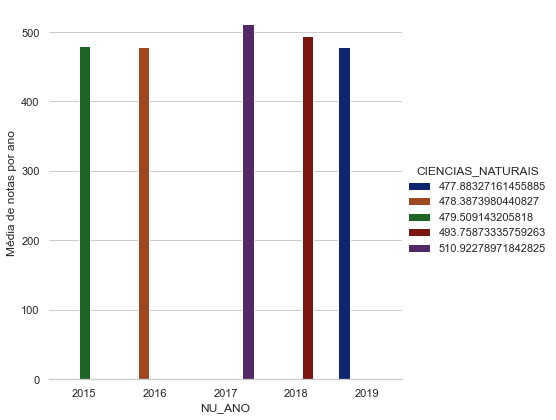

In [172]:
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="NU_ANO", y="CIENCIAS_NATURAIS", hue="CIENCIAS_NATURAIS", data=df_cn_pandas, height=6, kind="bar", palette="dark")
g.despine(left=True)
g.set_ylabels("Média de notas por ano")

In [184]:
# Este df contempla apenas as notas de ciências humanas por ano
df_ch = df_notas_sem_nulos.groupBy("NU_ANO").agg((sum("NU_NOTA_CH")/count("NU_INSCRICAO")).alias("CIENCIAS_HUMANAS")).sort(col("NU_ANO").desc())

In [185]:
df_ch_pandas = df_ch.toPandas()
df_ch_pandas

,NU_ANO,CIENCIAS_HUMANAS
0,2019,509.890593
1,2018,570.811699
2,2017,521.452671
3,2016,535.326959
4,2015,559.268777


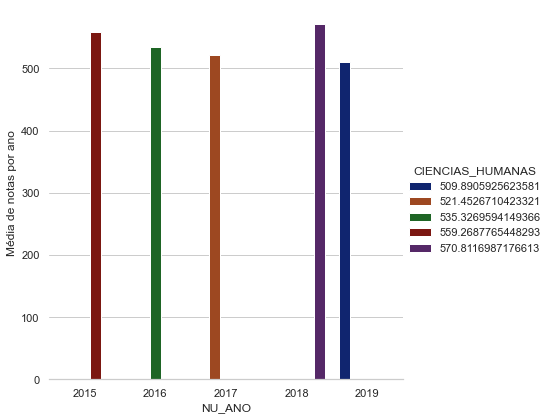

In [186]:
sns.set(style="whitegrid")
g = sns.catplot(x="NU_ANO", y="CIENCIAS_HUMANAS", hue="CIENCIAS_HUMANAS", data=df_ch_pandas, height=6, kind="bar", palette="dark")
g.despine(left=True)
g.set_ylabels("Média de notas por ano")

In [187]:
# Este df contempla apenas as notas de linguagem codigo por ano
df_lc = df_notas_sem_nulos.groupBy("NU_ANO").agg((sum("NU_NOTA_LC")/count("NU_INSCRICAO")).alias("LINGUAGEM_CODIGO")).sort(col("NU_ANO").desc())

In [188]:
df_lc_pandas = df_lc.toPandas()
df_lc_pandas

,NU_ANO,LINGUAGEM_CODIGO
0,2019,522.396600
1,2018,528.516471
2,2017,512.150568
3,2016,521.042568
4,2015,505.578629


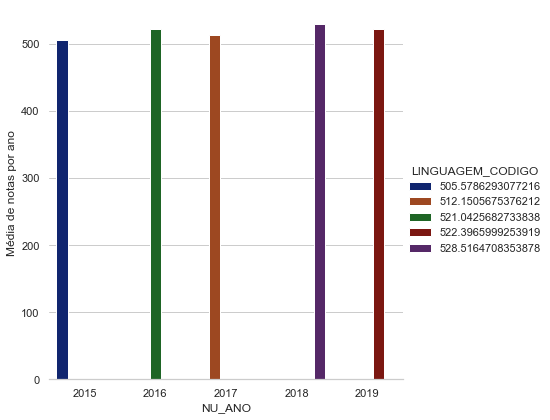

In [190]:
sns.set(style="whitegrid")

g = sns.catplot(x="NU_ANO", y="LINGUAGEM_CODIGO", hue="LINGUAGEM_CODIGO", data=df_lc_pandas, height=6, kind="bar", palette="dark")
g.despine(left=True)
g.set_ylabels("Média de notas por ano")

In [191]:
# Este df contempla apenas as notas de matemática por ano
df_mt = df_notas_sem_nulos.groupBy("NU_ANO").agg((sum("NU_NOTA_MT")/count("NU_INSCRICAO")).alias("MATEMATICA")).sort(col("NU_ANO").desc())

In [192]:
df_mt_pandas = df_mt.toPandas()
df_mt_pandas

,NU_ANO,MATEMATICA
0,2019,523.185098
1,2018,535.490338
2,2017,518.832682
3,2016,490.233816
4,2015,468.088781


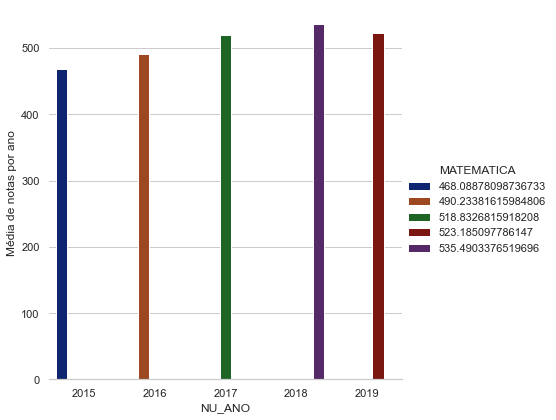

In [193]:
g = sns.catplot(x="NU_ANO", y="MATEMATICA", hue="MATEMATICA", data=df_mt_pandas, height=6, kind="bar", palette="dark")
g.despine(left=True)
g.set_ylabels("Média de notas por ano")

In [198]:
df_rdc = df_notas_sem_nulos.groupBy("NU_ANO").agg((sum("NU_NOTA_REDACAO")/count("NU_INSCRICAO")).alias("REDACAO")).sort(col("NU_ANO").desc())

In [199]:
df_rdc_pandas = df_rdc.toPandas()
df_rdc_pandas

,NU_ANO,REDACAO
0,2019,579.769406
1,2018,516.058559
2,2017,529.387960
3,2016,530.315316
4,2015,534.851685


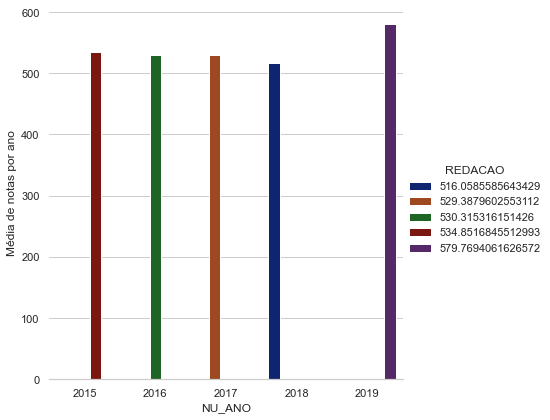

In [200]:
g = sns.catplot(x="NU_ANO", y="REDACAO", hue="REDACAO", data=df_rdc_pandas, height=6, kind="bar", palette="dark")
g.despine(left=True)
g.set_ylabels("Média de notas por ano")